# 1. 시계열 데이터의 특징 
- Tsfresh 라이브러리는 시계열 데이터의 Feature를 자동으로 추출하고 검증할 때 사용

In [1]:
# ① tsfresh 라이브러리 
!pip install tsfresh -qq

In [3]:
# ③ robot execution 데이터셋 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
download_robot_execution_failures()

In [4]:
# ④ 불러온 데이터 확인
timeseries, y = load_robot_execution_failures()

- timeseries : 데이터셋의 feature 입니다. (독립변수)
- y : True, False로 되어있는 binary classification 입니다. (종속변수)

In [5]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [6]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [7]:
# ⑤ 특징 추출(feature extraction)
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 528/528 [00:54<00:00,  9.63it/s]


- column_sort='time'은 extract_features 함수에게 데이터를 시간 순서대로 정렬하여 특징을 추출하도록 지시하는 역할

In [8]:
extracted_features

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,NaN,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,NaN,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,NaN,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,NaN,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,NaN,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,NaN,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,NaN,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,NaN,40.285714


- select feature : 주어진 데이터로부터 가장 유용한 특징들을 선택하는 과정입니다. 일반적으로 고차원의 특징 공간에서 유용하지 않거나 중복된 특징들을 제거하여 모델의 복잡성을 줄이는 데 사용됩니다.


In [9]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# ⑥ impute
impute(extracted_features)

# ⑦ select_features(X, y)
features_filtered = select_features(extracted_features, y)

/opt/conda/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


- impute
    - 특징 추출된 모든 값을 동일한 열의 평균/극단값으로 바꿉니다.
    - -inf -> min
    - +inf -> max
    - NaN -> median
-  select_features(X, y)
    - 특징 행렬 X의 모든 특징(열)의 중요성을 확인하고 관련 특징만 포함하는 축소된 특징 행렬을 반환합니다.(필터링)

In [10]:
features_filtered  

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.310265,-0.751682,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,-0.202951,0.057818,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.539121,0.912474,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-2.641390,-0.609735,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.591927,0.072771,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,42780.0,53.404120,71.428571,1563.528889,...,38.559593,71.641254,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,1523.0,10.076375,12.142857,14.755556,...,14.429645,16.349699,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,21064.0,37.473546,47.714286,2788.595556,...,60.760842,71.095480,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,308658.0,143.447551,157.285714,6415.715556,...,109.029954,173.699573,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2


# 2. 시계열의 특징을 바탕으로, 머신러닝을 통해 시계열 분류

In [11]:
 # ④ 추가로 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

- 데이터셋 인덱스가 설정돼있으므로, 따로 train_test_split해주는 함수를 만들어줘야 한다

## 1) 데이터셋 가공

In [12]:
# ⑤ 데이터셋 가공
def custom_classification_split(x, y, test_size=0.3):
    num_true = int(y.sum()*test_size)           # int(21 * 0.3) = 6
    num_false = int((len(y)-y.sum())*test_size) # int((88 - 21)*0.3) = 20

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    # y==False인것과 y==True인것의 인덱스값을 리스트로 변환하여 더해줍니다.
    # y[y==False].head(num_false).index.to_list()는 19~38까지의 값이 리스트로
    # y[y==True].head(num_true).index.to_list()는 1~6까지의 값이 리스트로 
    # id_list는 20~39 + 2~7이 더해진 리스트입니다.

    y_train = y.drop(id_list)                            # y에서 id_list를 drop합니다.  
    y_test = y.iloc[id_list].sort_index()                # 20~39, 2~7이 합쳐진 리스트를 정렬합니다.
    X_train = x[~x['id'].isin(id_list)] # 대괄호 안에 있는 timeseries의 id와 id_list가 일치하는 것만 사용하고 물결표시는 안에 조건이 포함되어 있지 않는것만 사용하는 것입니다.
    X_test = x[x['id'].isin(id_list)]   # timeseries의 id와 id_list가 일치하는 것만 사용해서 timeseries에 적용

    return X_train, y_train, X_test, y_test

In [13]:
# 커스텀한 함수를 적용한 데이터셋이 어떤 차이가 있는지 확인해봅시다.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y)
print(X_train)
print('-'*50)
print(y_train)
print('-'*50)
print(X_test)
print('-'*50)
print(y_test)

      id  time  F_x  F_y  F_z  T_x  T_y  T_z
90     7     0   -3    1   53  -10   -4    0
91     7     1    0   -2   65   -4   -1    0
92     7     2   -1   -1   56   -7   -3    0
93     7     3    0   -2   60   -6    0    0
94     7     4   -1   -1   57   -7   -4    0
...   ..   ...  ...  ...  ...  ...  ...  ...
1315  88    10  -10    2   39  -21  -24    5
1316  88    11  -11    2   38  -24  -22    6
1317  88    12  -12    3   23  -24  -24    5
1318  88    13  -13    4   26  -29  -27    5
1319  88    14  -13    2   15  -25  -25    6

[930 rows x 8 columns]
--------------------------------------------------
7      True
8      True
9      True
10     True
11     True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 62, dtype: bool
--------------------------------------------------
     id  time  F_x  F_y  F_z  T_x  T_y  T_z
0     1     0   -1   -1   63   -3   -1    0
1     1     1    0    0   62   -3   -1    0
2     1     2   -1   -1   61   -3    0    0
3 

## 2) 특징 추출하기
    - MinimalFCParameters : feature를 최소(minimal)로 하여 계산을 수행합니다. 데이터셋 크기가 큰 경우 모든 feature를 계산하기 전에 설정을 minimal로 변경하여 빠르게 테스트하기 위해 사용합니다.
    - train과 test 데이터셋을 minimal하게 계산한 값으로 변경해줍니다.

In [22]:
# ⑥ 특징추출하기
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

settings = MinimalFCParameters() # 계산 효율을 위해 minimal 셋팅
minimal_features_train = extract_features(
                                X_train,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

minimal_features_test = extract_features(
                                X_test,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

Feature Extraction: 100%|██████████| 156/156 [00:00<00:00, 2691.16it/s]


## 3) 추출된 특징 확인

In [16]:
# ⑦ 추출된 특징 확인
minimal_features_train

,F_x__sum_values,F_x__median,F_x__mean,F_x__length,F_x__standard_deviation,F_x__variance,F_x__root_mean_square,F_x__maximum,F_x__absolute_maximum,F_x__minimum,...,T_z__sum_values,T_z__median,T_z__mean,T_z__length,T_z__standard_deviation,T_z__variance,T_z__root_mean_square,T_z__maximum,T_z__absolute_maximum,T_z__minimum
7,-13.0,-1.0,-0.866667,15.0,0.805536,0.648889,1.183216,0.0,3.0,-3.0,...,-1.0,0.0,-0.066667,15.0,0.442217,0.195556,0.447214,1.0,1.0,-1.0
8,-10.0,-1.0,-0.666667,15.0,1.135292,1.288889,1.316561,2.0,2.0,-2.0,...,0.0,0.0,0.000000,15.0,1.032796,1.066667,1.032796,3.0,3.0,-1.0
9,-10.0,-1.0,-0.666667,15.0,1.074968,1.155556,1.264911,2.0,3.0,-3.0,...,3.0,0.0,0.200000,15.0,1.045626,1.093333,1.064581,3.0,3.0,-1.0
10,-14.0,-1.0,-0.933333,15.0,0.249444,0.062222,0.966092,0.0,1.0,-1.0,...,0.0,0.0,0.000000,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
11,-13.0,-1.0,-0.866667,15.0,0.956847,0.915556,1.290994,1.0,3.0,-3.0,...,-3.0,0.0,-0.200000,15.0,0.400000,0.160000,0.447214,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-1073.0,-98.0,-71.533333,15.0,36.585729,1338.515556,80.346334,-25.0,110.0,-110.0,...,-232.0,-21.0,-15.466667,15.0,9.659998,93.315556,18.235497,0.0,28.0,-28.0
85,143.0,8.0,9.533333,15.0,4.616877,21.315556,10.592450,19.0,19.0,4.0,...,-52.0,-2.0,-3.466667,15.0,2.156128,4.648889,4.082483,0.0,7.0,-7.0
86,961.0,52.0,64.066667,15.0,38.235179,1461.928889,74.608757,148.0,148.0,21.0,...,-81.0,-8.0,-5.400000,15.0,5.462600,29.840000,7.681146,8.0,10.0,-10.0
87,4509.0,338.0,300.600000,15.0,57.753268,3335.440000,306.097697,342.0,342.0,171.0,...,475.0,35.0,31.666667,15.0,9.903983,98.088889,33.179311,44.0,44.0,13.0


In [17]:
minimal_features_train.columns

Index(['F_x__sum_values', 'F_x__median', 'F_x__mean', 'F_x__length',
       'F_x__standard_deviation', 'F_x__variance', 'F_x__root_mean_square',
       'F_x__maximum', 'F_x__absolute_maximum', 'F_x__minimum',
       'F_y__sum_values', 'F_y__median', 'F_y__mean', 'F_y__length',
       'F_y__standard_deviation', 'F_y__variance', 'F_y__root_mean_square',
       'F_y__maximum', 'F_y__absolute_maximum', 'F_y__minimum',
       'F_z__sum_values', 'F_z__median', 'F_z__mean', 'F_z__length',
       'F_z__standard_deviation', 'F_z__variance', 'F_z__root_mean_square',
       'F_z__maximum', 'F_z__absolute_maximum', 'F_z__minimum',
       'T_x__sum_values', 'T_x__median', 'T_x__mean', 'T_x__length',
       'T_x__standard_deviation', 'T_x__variance', 'T_x__root_mean_square',
       'T_x__maximum', 'T_x__absolute_maximum', 'T_x__minimum',
       'T_y__sum_values', 'T_y__median', 'T_y__mean', 'T_y__length',
       'T_y__standard_deviation', 'T_y__variance', 'T_y__root_mean_square',
       'T_y__maximu

## 4) 추출된 특징 시각화

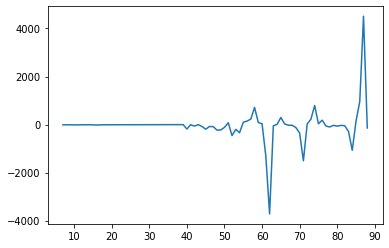

In [18]:
# ⑧ 추출된 특징 시각화하기
plt.plot(minimal_features_train['F_x__sum_values'])
plt.show()

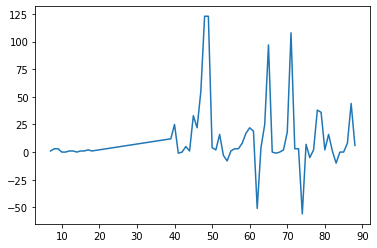

In [19]:
plt.plot(minimal_features_train['T_z__maximum'])
plt.show()

## 5)  Logistic Regression 사용하기
- 회귀분석이라는 명칭과는 다르게 분류(Classification)를 할 때도 사용할 수 있습니다.
- 현재 사용중인 robot_execution_failures 데이터셋에서 y가 True와 False로 이루어져 있습니다. 
- 이것은 이진 분류(binary classification) 문제이며 Logistic Regression을 사용할 수 있습니다.
- Logistic Regression은 어떤 범주에 속할 확률을 0(False)에서 1(True) 사이의 값으로 예측할 수 있습니다.
- x가 0.5보다 높거나 같은 경우 1, x가 0.5보다 낮은 경우는 0으로 분류합니다. (여기서 x는 독립변수인 feature라고 생각하시면 됩니다.)





In [20]:
# ⑨ Logistic Regression 사용하기
logistic = LogisticRegression() 
logistic.fit(minimal_features_train, y_train)

LogisticRegression()

In [23]:
# ⑩ Logistic Regression score 확인하기
logistic.score(minimal_features_test, y_test)

0.6923076923076923

## 6) 분류 성능 평가 지표 확인
-  Classification report는 scikit-learn에서 제공되는 기능입니다. 
- 모델 혹은 알고리즘은 score로만 결과를 신뢰할 수 없습니다. (여기서 말하는 모델 혹은 알고리즘은 Logistic Regression입니다)
- Classification의 대표적인 검증 지표로 Precision, Recall, F1-score를 사용합니다.
- 아래의 지표를 해석해보면 이진 분류이므로 True와 False 각각 정밀도(Precision), 재현율(Recall), 조화평균(F1-score)의 값을 보여줍니다.
- 정확도(accuracy)는 score와 같습니다.
- 매크로 평균(macro avg)은 평균의 평균이라고 합니다.(각 클래스별 평균 / 클래스 = 매크로 평균) 
- 여기서 클래스란 minimal_feature_train의 feature들을 말합니다. 
- 특징 추출 후 나온 feature의 개수는 60개 입니다.
- 가중 산술 평균(weighted avg)은 자료의 평균을 구할 때 자료 값의 중요도나 영향 정도에 해당하는 가중치를 반영하여 구한 평균값입니다.

In [25]:
# ⑪ 분류 성능 평가 지표 확인하기
# y는 True, False는 Target으로도 표현할 수 있습니다. 
classification_report(y_test,
                      logistic.predict(minimal_features_test),
                      target_names=['true', 'false'],
                      output_dict=True) # y_test 내부에 있는 true, false와 일치하는 이름을 표시합니다.

{'true': {'precision': 1.0,
  'recall': 0.6,
  'f1-score': 0.7499999999999999,
  'support': 20},
 'false': {'precision': 0.42857142857142855,
  'recall': 1.0,
  'f1-score': 0.6,
  'support': 6},
 'accuracy': 0.6923076923076923,
 'macro avg': {'precision': 0.7142857142857143,
  'recall': 0.8,
  'f1-score': 0.6749999999999999,
  'support': 26},
 'weighted avg': {'precision': 0.868131868131868,
  'recall': 0.6923076923076923,
  'f1-score': 0.7153846153846153,
  'support': 26}}

- true 예측은 1로 너무 정밀한데, False는 0.43d으로 False를 예측하는데 별로 좋은 모델은 아니다